In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('obsmat.txt', sep='  ', header=None, names=['frame_number', 'pedestrian_ID', 'pos_x', 'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y'])
groups=pd.read_csv('groups.txt',sep=' ', names=['a','b','c','d','e','f'])

In [3]:
data['group_size'] = 0
data['group_number'] = 0
groups['a']=groups['a'].astype(float)
groups['b']=groups['b'].astype(float)
groups['group_size'] =  groups.apply(lambda x: 6 - (x.isnull().sum()), axis='columns')
groups['group_number'] = range(1,len(groups)+1)
data = data.drop(['pos_z', 'v_z'], axis=1)

In [4]:
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_size'][i] = groups['group_size'][j]

            
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_number'][i] = groups['group_number'][j]

In [5]:
data['centroid_x'] = 0.0
data['centroid_y'] = 0.0


In [6]:
data.loc[data['group_number']==2]['pedestrian_ID'].unique()

array([2., 3., 6.])

In [7]:
data[data['group_size'] == 0]

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,group_size,group_number,centroid_x,centroid_y
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,0,0,0.0,0.0
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,0,0,0.0,0.0
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,0,0,0.0,0.0
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,0,0,0.0,0.0
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8883,12363.0,363.0,13.479300,5.417070,0.625566,-0.314859,0,0,0.0,0.0
8886,12363.0,367.0,11.201661,8.443910,0.000000,0.000000,0,0,0.0,0.0
8892,12369.0,367.0,11.201661,8.443910,0.000000,0.000000,0,0,0.0,0.0
8898,12375.0,367.0,11.201661,8.443910,0.000000,0.000000,0,0,0.0,0.0


In [8]:
frames = data['frame_number'].unique().tolist()

In [9]:
for i in frames:
    grouped = data[data['frame_number'] == i].groupby('group_number').mean()
    grouped = grouped.reset_index()
    for j in grouped.group_number.tolist():
        data.loc[(data.frame_number == i) & (data.group_number == j),'centroid_x']=grouped[grouped['group_number'] == j]['pos_x'].item()
        data.loc[(data.frame_number == i) & (data.group_number == j),'centroid_y']=grouped[grouped['group_number'] == j]['pos_y'].item()
        data.loc[data['group_number'] == 0, 'centroid_x'] = 0
        data.loc[data['group_number'] == 0, 'centroid_y'] = 0

In [10]:
data['dist_x'] = data['centroid_x'] - data['pos_x']
data['dist_y'] = data['centroid_y'] - data['pos_y']
data.loc[data['group_number'] == 0, 'dist_x'] = 0
data.loc[data['group_number'] == 0, 'dist_y'] = 0

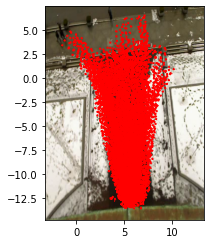

In [11]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("reference.png")
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[-3.28, 13.29, -14.8, 7.45])
for i in range(1,len(groups)):
    ax.plot(data[data['group_number'] == i]['pos_y'],-data[data['group_number'] == i]['pos_x'], ls='dotted', linewidth=2, color='red')
    

In [12]:
def square(list):
    return [i ** 2 for i in list]

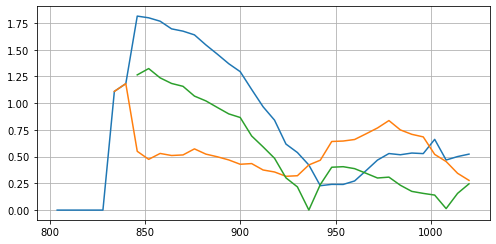

In [13]:
plt.plot(data.loc[data['pedestrian_ID']==2]['frame_number'], np.abs(data.loc[data['pedestrian_ID']==2]['dist_x']))
plt.plot(data.loc[data['pedestrian_ID']==3]['frame_number'], np.abs(data.loc[data['pedestrian_ID']==3]['dist_x']))
plt.plot(data.loc[data['pedestrian_ID']==6]['frame_number'], np.abs(data.loc[data['pedestrian_ID']==6]['dist_x']))
plt.grid()

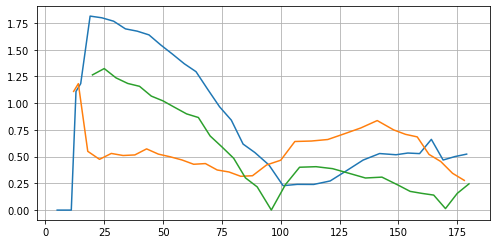

In [14]:
plt.plot( np.abs(data.loc[data['pedestrian_ID']==2]['dist_x']))
plt.plot( np.abs(data.loc[data['pedestrian_ID']==3]['dist_x']))
plt.plot( np.abs(data.loc[data['pedestrian_ID']==6]['dist_x']))
plt.grid()

In [15]:
data[data['group_size']==6]

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,group_size,group_number,centroid_x,centroid_y,dist_x,dist_y
214,1074.0,14.0,12.937850,6.702716,-0.988222,0.732326,6,4,12.937850,6.702716,0.000000,0.000000
221,1080.0,14.0,12.542562,6.995647,-0.994813,0.688091,6,4,12.542562,6.995647,0.000000,0.000000
228,1086.0,15.0,12.853236,6.364796,-0.922201,0.054238,6,4,12.497618,6.808993,-0.355618,0.444196
229,1086.0,14.0,12.142000,7.253189,-0.879436,0.252451,6,4,12.497618,6.808993,0.355618,-0.444197
236,1092.0,15.0,12.484356,6.386491,-1.012246,0.300887,6,4,12.161684,6.792050,-0.322672,0.405558
...,...,...,...,...,...,...,...,...,...,...,...,...
8072,11553.0,334.0,11.398860,4.645988,1.369507,0.253067,6,54,12.093150,5.467985,0.694290,0.821997
8073,11553.0,337.0,12.468365,5.925894,1.397700,-0.266955,6,54,12.093150,5.467985,-0.375215,-0.457908
8074,11553.0,336.0,11.162736,5.522248,0.670783,-0.227991,6,54,12.093150,5.467985,0.930414,-0.054262
8075,11553.0,338.0,12.673190,6.490212,1.293289,-0.270921,6,54,12.093150,5.467985,-0.580040,-1.022226


In [16]:
for i in data['group_number'].unique():
    print(i)

0
2
1
3
4
5
6
7
8
9
10
11
12
13
14
15
16
18
17
19
20
21
22
23
24
25
26
28
27
29
31
30
32
33
34
35
38
36
37
39
40
41
43
42
44
45
46
47
48
49
50
51
52
53
55
54
56
57
59
58
60
61


In [17]:
def plot_max_values(group_number):
    subset = data[data['group_number']==group_number]
    list_frames = []
    list_x = []
    list_y = []
    for i in subset['frame_number']:
        max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
        max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
        list_frames.append(i)
        list_x.append(max_x)
        list_y.append(max_y)
    plt.plot(list_x)
    plt.xlabel('Frame Number')
    plt.grid()
    plt.show()
    
    plt.plot(list_y)
    plt.grid()
    plt.show()
    
    return()

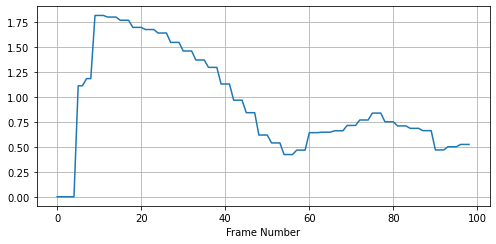

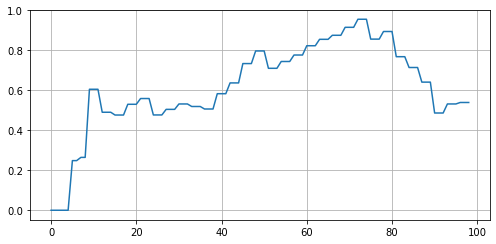

()

In [18]:
plot_max_values(2)

In [19]:
def plot_group_size_values(group_size):
    group_size_subset = data[data['group_size']==group_size]
    group_list_x = []
    group_list_y = []
    for i in group_size_subset['group_number'].unique():
        subset = group_size_subset[group_size_subset['group_number']==i]
        list_frames = []
        list_x = []
        list_y = []
        for i in subset['frame_number']:
            max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
            max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
            list_frames.append(i)
            list_x.append(max_x)
            list_y.append(max_y)
        group_list_x.append(list_x)
        group_list_y.append(list_y)
    for points in group_list_x:
        plt.plot(points)
    plt.grid()
    plt.show()

    for points in group_list_y:
        plt.plot(points)
    plt.grid()
    plt.show()
    
    return()
        

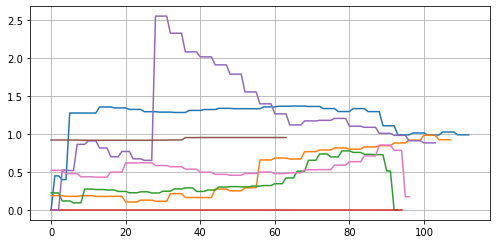

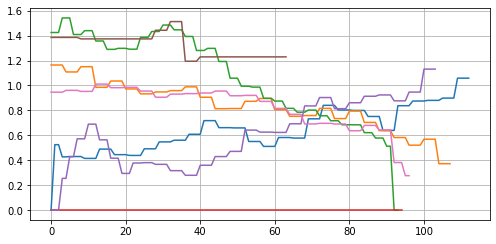

()

In [20]:
plot_group_size_values(4)

In [21]:
def plot_group_size_radius(group_size):
    group_size_subset = data[data['group_size']==group_size]
    radius = []
    for i in group_size_subset['group_number'].unique():
        subset = group_size_subset[group_size_subset['group_number']==i]
        list1 = []
        for i in subset['frame_number']:
            max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
            max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
            list1.append(np.sqrt(max_x**2+max_y**2))
        radius.append(list1)
    for points in radius:
        plt.plot(points)
    plt.grid()
    plt.show()

    
    return()

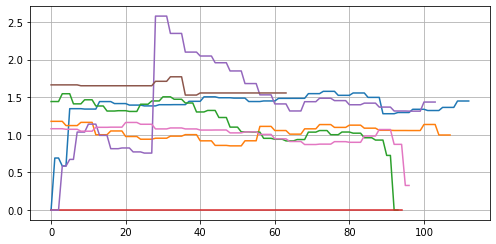

()

In [22]:
plot_group_size_radius(4)

### for each time frame, find the distance of an individual that is not in group x and group x' centroid, if the distance is less than the radius of the group (aka the max distance of a person in a group from the group's centroid) then the person crossed the group.

In [23]:
def crossing_group(group_size):
    for group_number in data[data['group_size'] == group_size]['group_number'].unique():
        
        group_subset = data[data['group_number'] == group_number]
        frames = group_subset['frame_number'].unique().tolist()
        ind_not_in_group = data[(data['frame_number'].isin(frames)) & (data['group_number'] != group_number)]
        gr = []
        for j in ind_not_in_group['pedestrian_ID'].unique():
            list1 = []
            for i in group_subset['frame_number'].unique():
                max_x = np.abs(group_subset[group_subset['frame_number'] == i]['dist_x']).max()
                max_y = np.abs(group_subset[group_subset['frame_number'] == i]['dist_y']).max()
                group_radius = np.sqrt(max_x**2+max_y**2)


                x_pos = ind_not_in_group[(ind_not_in_group['pedestrian_ID'] == j) & (ind_not_in_group['frame_number'] == i)]['pos_x'].tolist()

                y_pos = ind_not_in_group[(ind_not_in_group['pedestrian_ID'] == j) & (ind_not_in_group['frame_number'] == i)]['pos_y'].tolist()

                dist_x = x_pos - group_subset[(group_subset['frame_number'] == i) & (group_subset['frame_number'] == i)]['centroid_x'].unique()

                dist_y = x_pos - group_subset[(group_subset['frame_number'] == i) & (group_subset['frame_number'] == i)]['centroid_y'].unique()

                ind_radius = np.sqrt(dist_x**2+dist_y**2)
                diff  = ind_radius - group_radius
                if diff != np.nan:
                    list1.append(float(diff))
                else:
                    list1.append(np.nan)
            gr.append(list1)
        for points in gr:
            plt.plot(points)
        plt.hlines(y=0.0, xmin=0, xmax=40, linewidth=1, color='b')
        plt.show()
    
    return()
            
            
        

In [48]:
def crossing_group_size(group_size):
    gr =[]
    for group_number in data[data['group_size'] == group_size]['group_number'].unique():
        
        group_subset = data[data['group_number'] == group_number]
        frames = group_subset['frame_number'].unique().tolist()
        ind_not_in_group = data[(data['frame_number'].isin(frames)) & (data['group_number'] != group_number)]
        #gr = []
        for j in ind_not_in_group['pedestrian_ID'].unique():
            list1 = []
            for i in group_subset['frame_number'].unique():
                max_x = np.abs(group_subset[group_subset['frame_number'] == i]['dist_x']).max()
                max_y = np.abs(group_subset[group_subset['frame_number'] == i]['dist_y']).max()
                group_radius = np.sqrt(max_x**2+max_y**2)


                x_pos = ind_not_in_group[(ind_not_in_group['pedestrian_ID'] == j) & (ind_not_in_group['frame_number'] == i)]['pos_x'].tolist()

                y_pos = ind_not_in_group[(ind_not_in_group['pedestrian_ID'] == j) & (ind_not_in_group['frame_number'] == i)]['pos_y'].tolist()

                dist_x = x_pos - group_subset[(group_subset['frame_number'] == i) & (group_subset['frame_number'] == i)]['centroid_x'].unique()

                dist_y = x_pos - group_subset[(group_subset['frame_number'] == i) & (group_subset['frame_number'] == i)]['centroid_y'].unique()

                ind_radius = np.sqrt(dist_x**2+dist_y**2)
                diff  = ind_radius - group_radius
                if diff != np.nan:
                    list1.append(float(diff))
                else:
                    list1.append(np.nan)
            gr.append(list1)
    plt.figure(figsize=(15,10))
    for points in gr:
        
        plt.plot(points)
    
    plt.grid(which = "minor")
    plt.minorticks_on()
    plt.hlines(y=0.0, xmin=0, xmax=40, linewidth=1, color='b')
    plt.grid()
    plt.show()
    
    return()
            
            
        

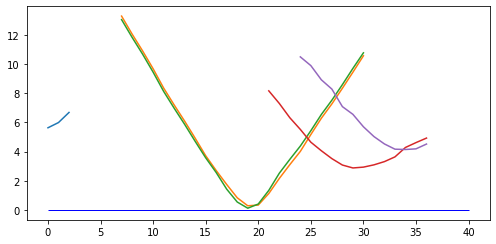

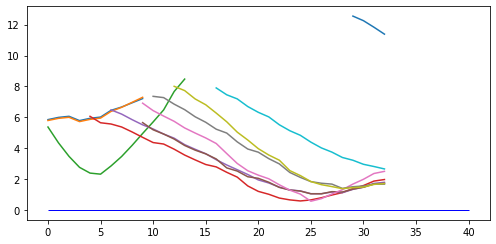

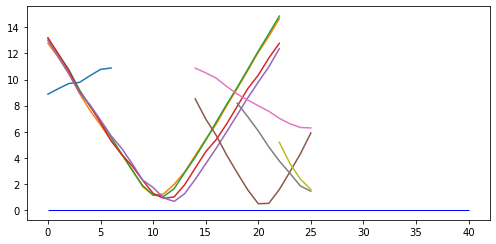

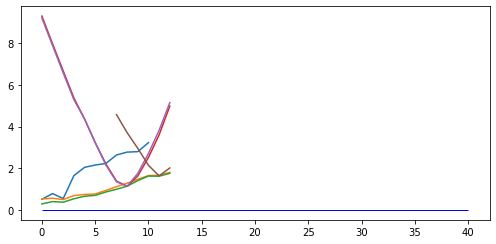

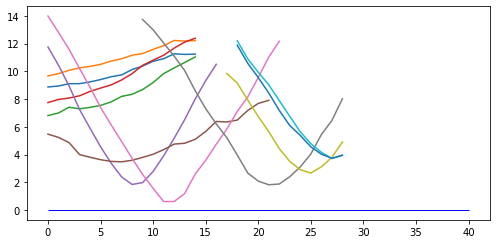

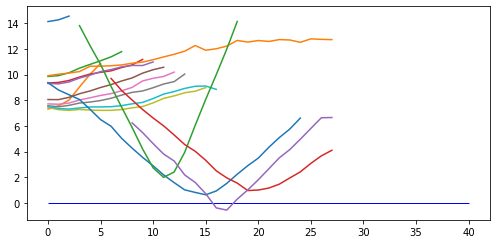

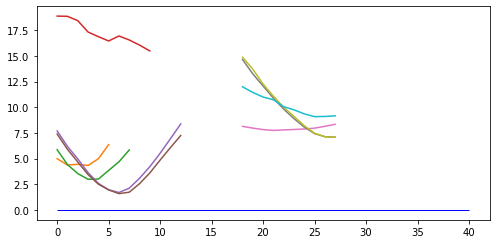

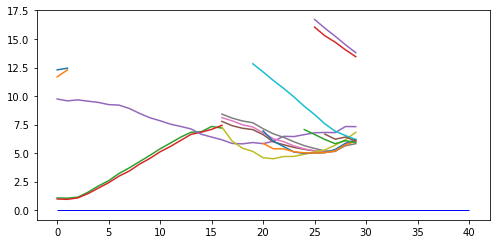

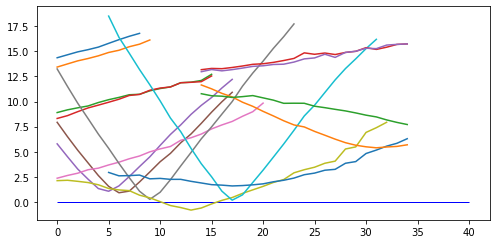

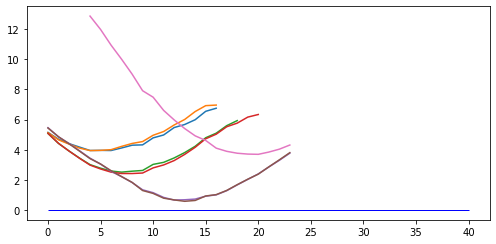

()

In [32]:
crossing_group(3)

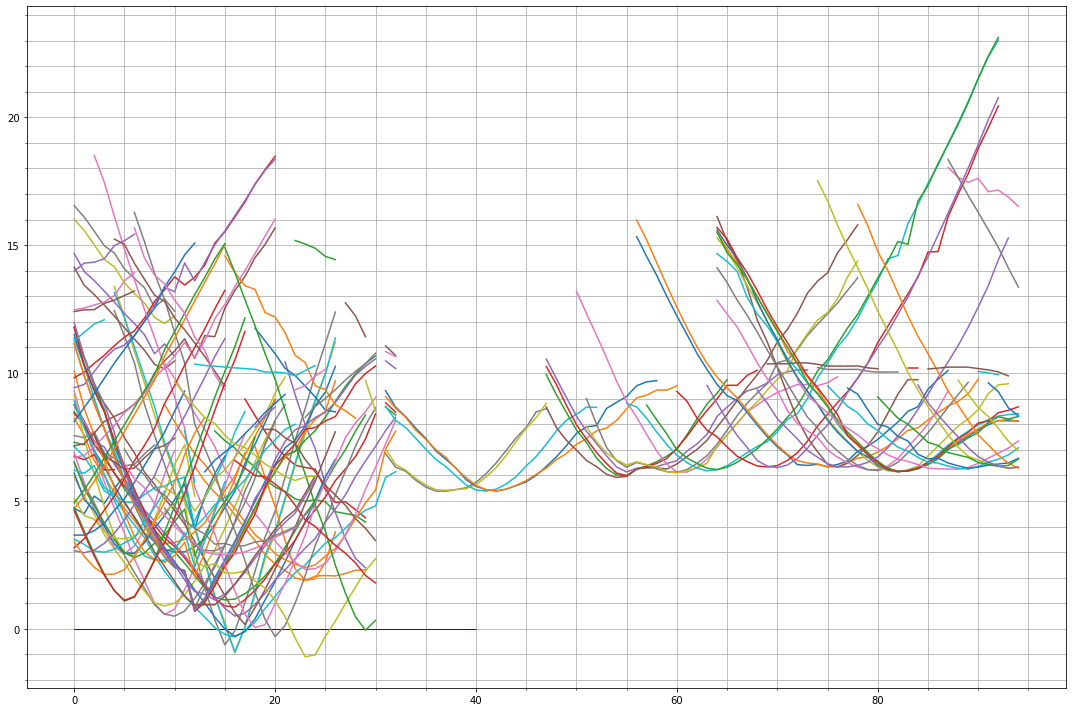

()

In [50]:
crossing_group_size(4)

In [ ]:
def crossing_group_size_to_plot(group_size):
    finfordiff =[]
    finforrad = []
    for group_number in data[data['group_size'] == group_size]['group_number'].unique():
        
        group_subset = data[data['group_number'] == group_number]
        frames = group_subset['frame_number'].unique().tolist()
        ind_not_in_group = data[(data['frame_number'].isin(frames)) & (data['group_number'] != group_number)]
        #gr = []
        for j in ind_not_in_group['pedestrian_ID'].unique():
            listfordiff = []
            listforrad = []
            for i in group_subset['frame_number'].unique():
                max_x = np.abs(group_subset[group_subset['frame_number'] == i]['dist_x']).max()
                max_y = np.abs(group_subset[group_subset['frame_number'] == i]['dist_y']).max()
                group_radius = np.sqrt(max_x**2+max_y**2)
                listforrad.append(group_radius)

                x_pos = ind_not_in_group[(ind_not_in_group['pedestrian_ID'] == j) & (ind_not_in_group['frame_number'] == i)]['pos_x'].tolist()

                y_pos = ind_not_in_group[(ind_not_in_group['pedestrian_ID'] == j) & (ind_not_in_group['frame_number'] == i)]['pos_y'].tolist()

                dist_x = x_pos - group_subset[(group_subset['frame_number'] == i) & (group_subset['frame_number'] == i)]['centroid_x'].unique()

                dist_y = x_pos - group_subset[(group_subset['frame_number'] == i) & (group_subset['frame_number'] == i)]['centroid_y'].unique()

                ind_radius = np.sqrt(dist_x**2+dist_y**2)
                diff  = ind_radius - group_radius
                
                if diff != np.nan:
                    listfordiff.append(float(diff))
                else:
                    listfordiff.append(np.nan)
            finfordiff.append(listfordiff)
            finfordiff.append(listforrad)

    
    return(finfordiff)
            
            
       

In [ ]:
def plotting(group_size):
    
    my_list = crossing_group_size_to_plot(group_size)
    for i in range(0,len(my_list),2):
        plt.scatter(my_list[0+i], my_list[1+i])
        plt.ylabel('Group Radius')
        plt.xlabel('Dist from Group Radius')
    plt.show()
    return()

In [ ]:
plotting(5)